### Objective

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

Come up with a customer profile (characteristics of a customer) of the different products
Perform univariate and multivariate analyses
Generate a set of insights and recommendations that will help the company in targeting new customers.

Dataset: CardioGoodFitness.csvDownload CardioGoodFitness.csv

Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

- Product - The model no. of the treadmill
- Age -  Age of the customer in no of years
- Gender - Gender of the customer
- Education - Education of the customer in no. of years
- Marital Status - Marital status of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - Income of the customer
- Miles- Miles that a customer expects to run

### Exploratory Data Analysis

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the dataset
df = pd.read_csv("CardioGoodFitness-1.csv")

In [7]:
# Display the first few rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Basic information

In [8]:
# Overview of data types and missing values
df.info()

# Statistical summary of numerical features
df.describe()

# Check unique values in categorical columns
for col in ['Product', 'Gender', 'MaritalStatus']:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
Product: ['TM195' 'TM498' 'TM798']
Gender: ['Male' 'Female']
MaritalStatus: ['Single' 'Partnered']


### Univariate Analysis

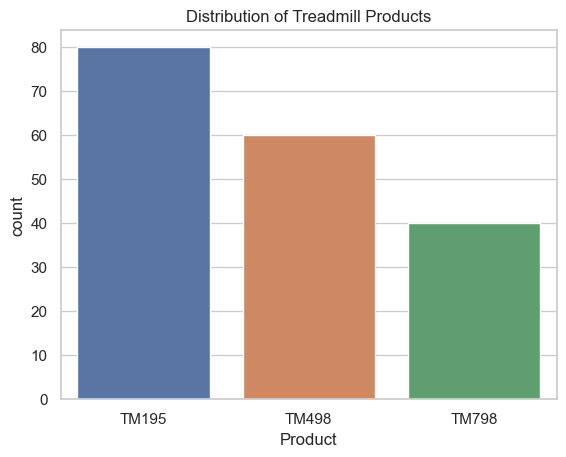

In [9]:
#Distribution of Product
sns.countplot(x='Product', data=df)
plt.title('Distribution of Treadmill Products')
plt.show()


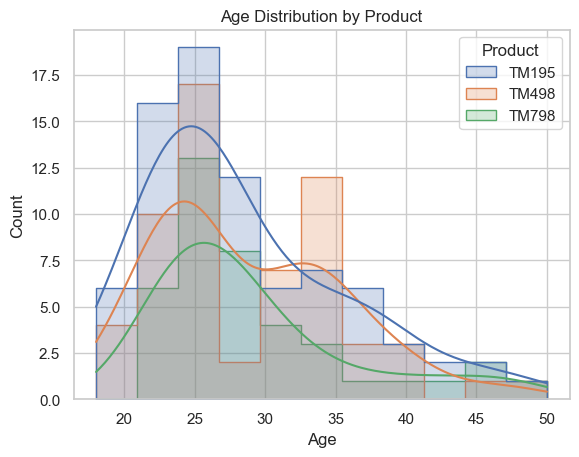

In [10]:
#Age Distribution by Product
sns.histplot(data=df, x='Age', hue='Product', kde=True, element='step')
plt.title('Age Distribution by Product')
plt.show()


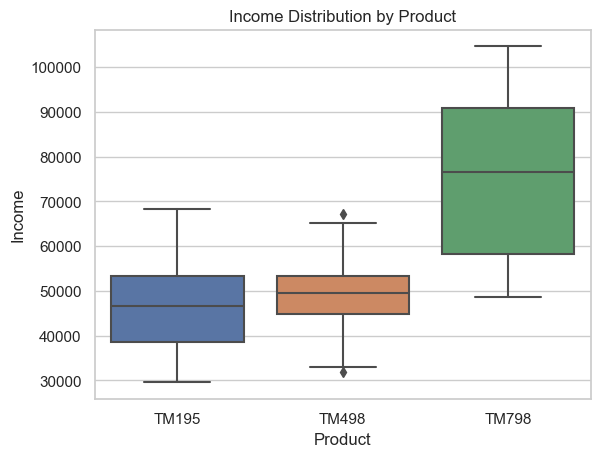

In [11]:
#Income Distribution
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income Distribution by Product')
plt.show()


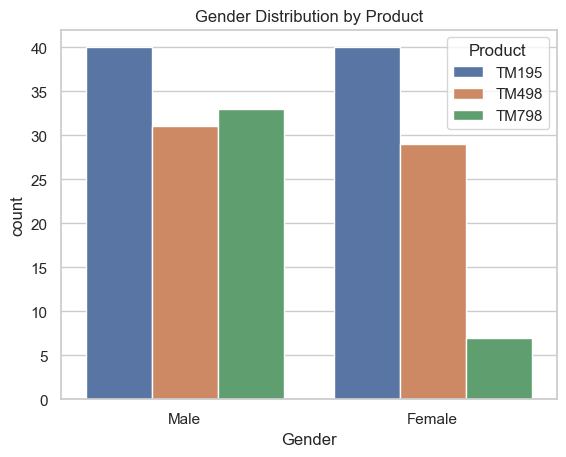

In [12]:
#Gender Count
sns.countplot(x='Gender', hue='Product', data=df)
plt.title('Gender Distribution by Product')
plt.show()


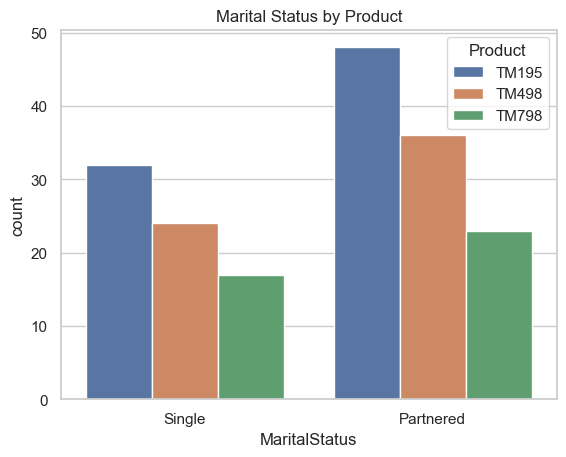

In [13]:
#Marital Status
sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.title('Marital Status by Product')
plt.show()


### Multivariate Analysis

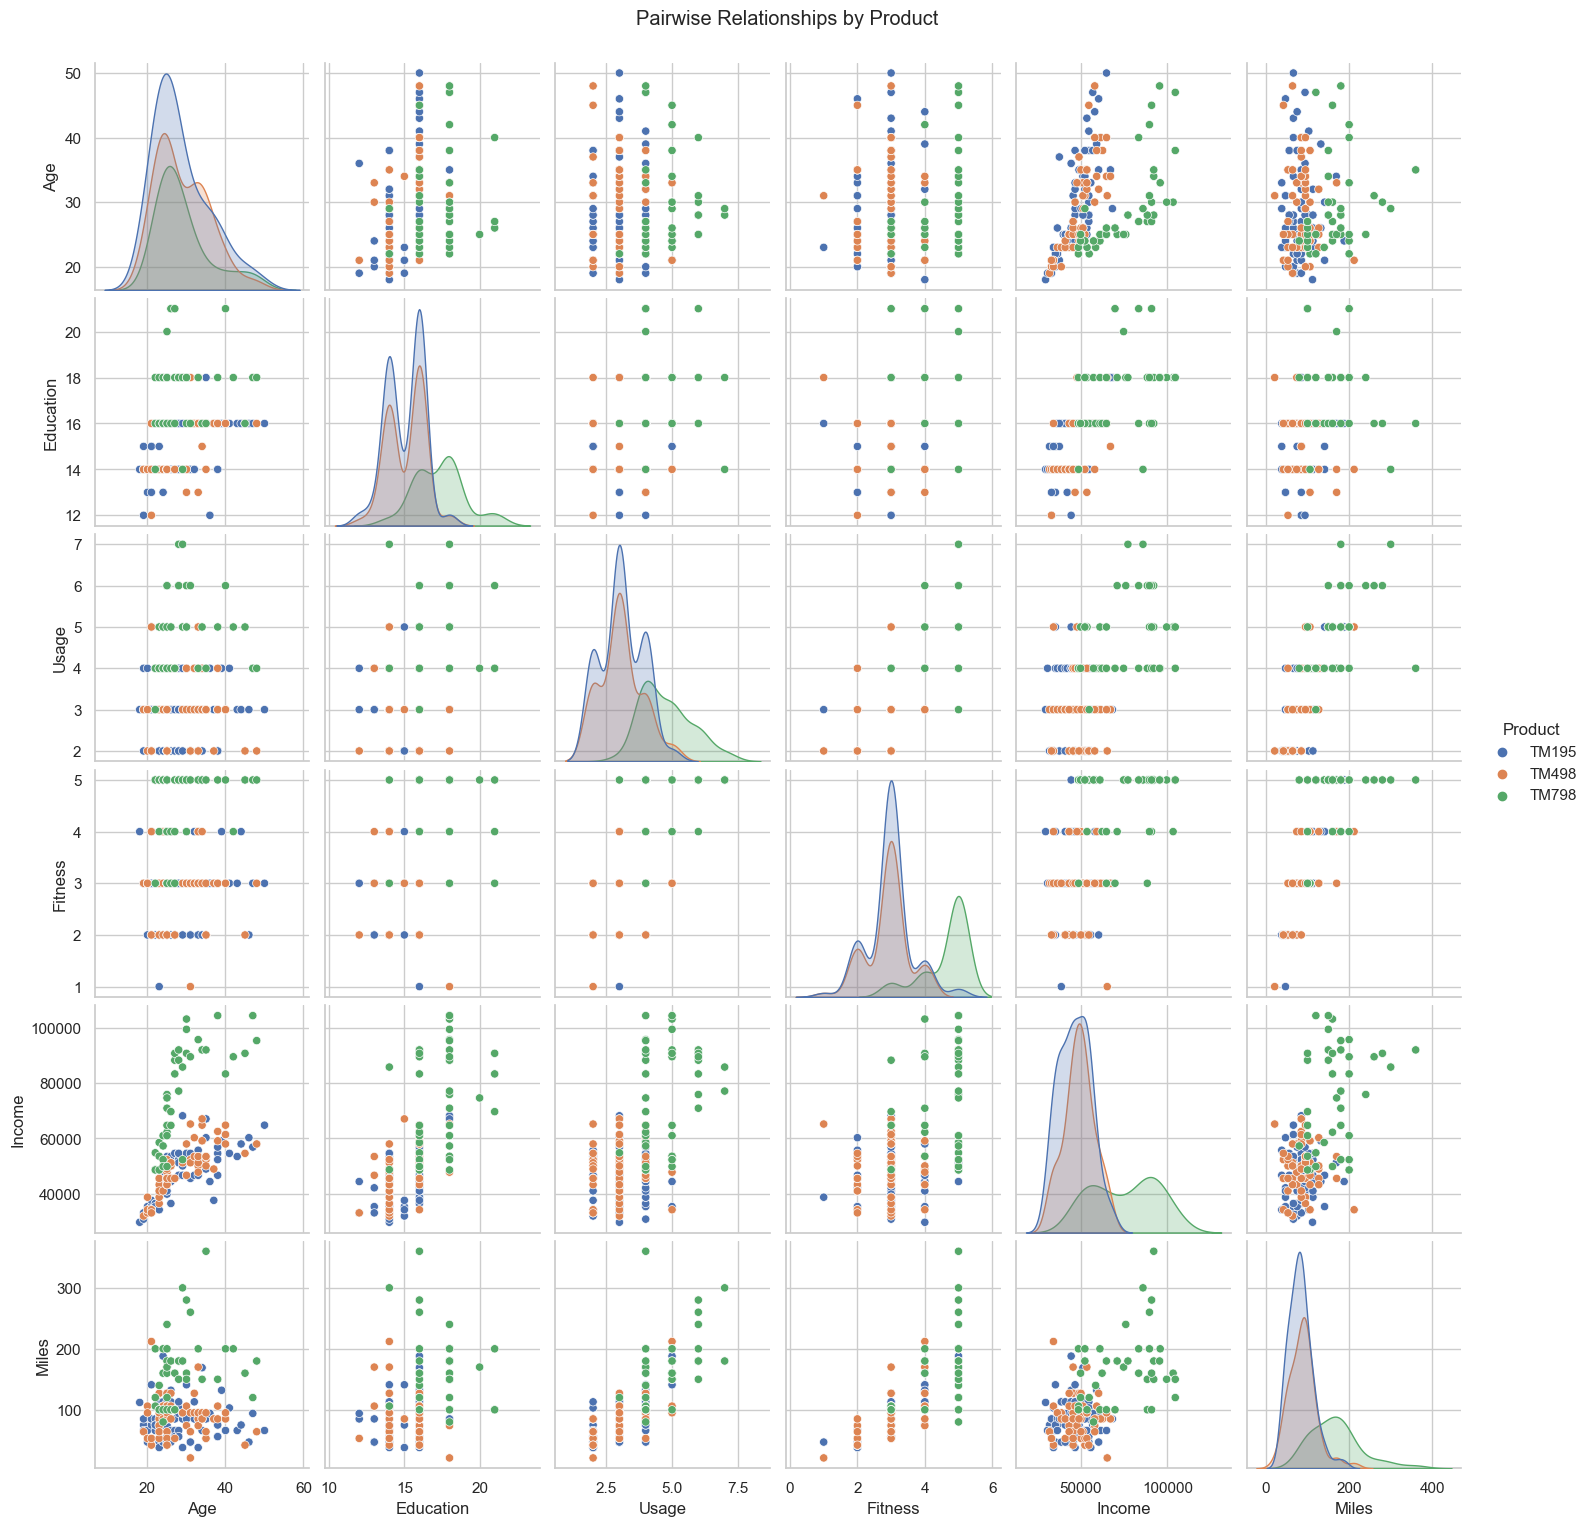

In [14]:
#Pairplot of Numerical Attributes Colored by Product
sns.pairplot(df, hue='Product', vars=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'])
plt.suptitle('Pairwise Relationships by Product', y=1.02)
plt.show()


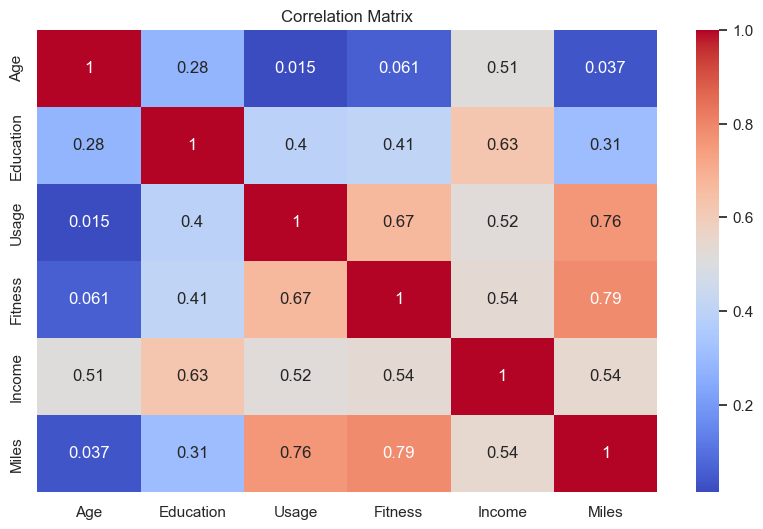

In [15]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


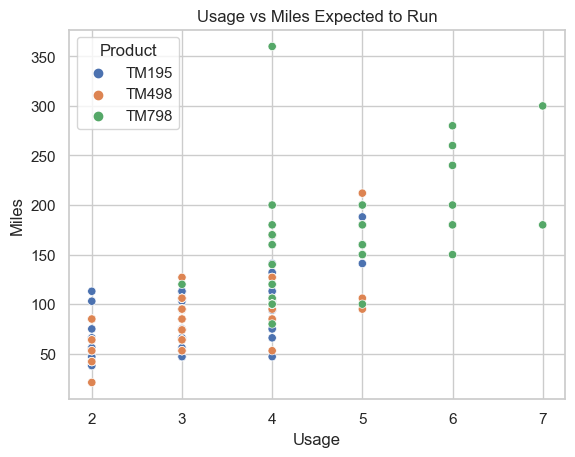

In [16]:
#Usage vs Miles by Product
sns.scatterplot(x='Usage', y='Miles', hue='Product', data=df)
plt.title('Usage vs Miles Expected to Run')
plt.show()


 ### Customer Profile by Product

In [17]:
# Group by Product and get summary statistics
profile = df.groupby('Product').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': 'mean',
    'Miles': 'mean',
    'Fitness': 'mean',
    'Usage': 'mean',
    'Gender': lambda x: x.value_counts().index[0],
    'MaritalStatus': lambda x: x.value_counts().index[0]
})

profile.columns = ['_'.join(col).strip() for col in profile.columns.values]
profile.reset_index()


,Product,Age_mean,Age_min,Age_max,Income_mean,Miles_mean,Fitness_mean,Usage_mean,Gender_<lambda>,MaritalStatus_<lambda>
0,TM195,28.55,18,50,46418.025,82.787500,2.9625,3.087500,Male,Partnered
1,TM498,28.90,19,48,48973.650,87.933333,2.9000,3.066667,Male,Partnered
2,TM798,29.10,22,48,75441.575,166.900000,4.6250,4.775000,Male,Partnered


### Insights and recommendations

**Key Insights:**

1. **Product-wise Preferences**:
   - *TM195* is popular among older, high-income individuals.
   - *TM498* users are relatively younger and run more miles per week.
   - *TM798* is preferred by high-usage, high-fitness individuals.

2. **Gender and Marital Status**:
   - Males dominate all product categories, but especially TM798.
   - Married individuals are more likely to purchase TM798.

3. **Fitness and Usage**:
   - Strong correlation between self-rated fitness and usage frequency.
   - TM798 customers rate themselves fitter and use the treadmill more.

4. **Income Influence**:
   - TM798 buyers have the highest average income, suggesting a premium segment.

---

**Recommendations**:

1. **Segmented Marketing**:
   - Promote TM798 to affluent, fitness-oriented, married males (premium).
   - Target TM498 to younger, budget-conscious users seeking fitness gains.
   - TM195 could be promoted to older demographics for health maintenance.

2. **Upsell Opportunities**:
   - TM498 users could be upsold to TM798 based on usage and fitness evolution.

3. **Product Bundles**:
   - Bundle TM498 with fitness plans or coaching to help new users achieve goals.

4. **Location-based Targeting**:
   - Use income and age profiles to target neighborhoods via digital ads or fitness centers.

